In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [6]:
#!pip install h2o

In [7]:
# import h2o
# print(h2o.__version__)
# from h2o.automl import H2OAutoML

# h2o.init(max_mem_size='16G')

All plants and animals need water to survive. There can be no life on earth without water. Why is water so important? Because 60 percent of our body weight is made up of water. Our bodies use water in all the cells, organs, and tissues, to help regulate body temperature and maintain other bodily functions. Because our bodies lose water through breathing, sweating, and digestion, it's crucial to rehydrate and replace water by drinking fluids and eating foods that contain water.

**Let’s look at all the ways water impacts our lives…**

Water helps by creating saliva

It regulates body temperature

Water aids cognitive functions

Water protects the tissues, spinal cord, and joints

Water maximizes our physical performance

It helps to boost our energy levels

Water prevents overall dehydration

In [8]:
df= pd.read_csv("D:\\DC Universe\\Ucsc\\Third Year\\SCS 3201 Machine Learning\\CCPP\\Csv Files\\water_potability.csv")

## Initial Analysis

In [9]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


There are 9 Independent features and 1 dependent features. Details for each features are provided in the above top. objective is to use the Potability feature as target feature for classification problem. Let is do more analysis to learn about the dataset better.

### Datatype of the features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Except Target feature, other features are float and continueous value. we can convert the Portability into Categoring feature

In [11]:
df['Potability']=df['Potability'].astype('category')

In [12]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

## Statistical analysis

In [13]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


From the above table, we can see that the count of each feature are not same. so there must me some null values.
Feature Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high.
However, the above description is for overall population. lets try the same for 2 samples based on Portability feature

In [14]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [15]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


### Check for missing values

In [16]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Features ph, Sulfate and Trihalomethanes are having null values. let us check those in details and find option to ha

In [17]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


Since the missing values are on both classess **(Potability 1 & 0)**, we can replace it with population mean. so, we will replace the Nan values bases on sample mean from both classes.

In [18]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [19]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Exploratory Data Analysis

In [21]:
!pip install plotly

  Using cached plotly-5.5.0-py2.py3-none-any.whl (26.5 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


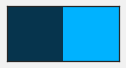

In [22]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

Text(0.8, 1500, 'Safe for Human consumption')

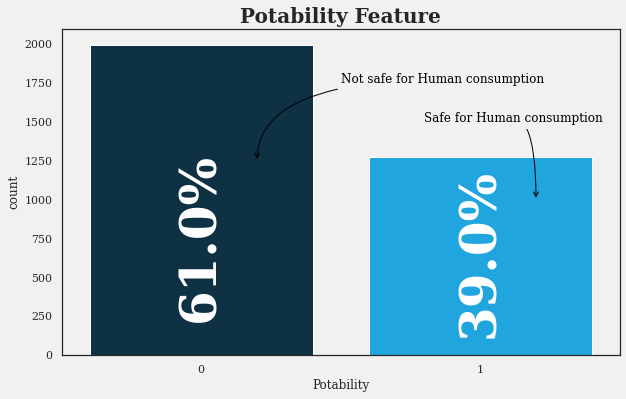

In [23]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

There is imbalance in the Target variable. which should be considered for modeling

### Distribution plots

In [24]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


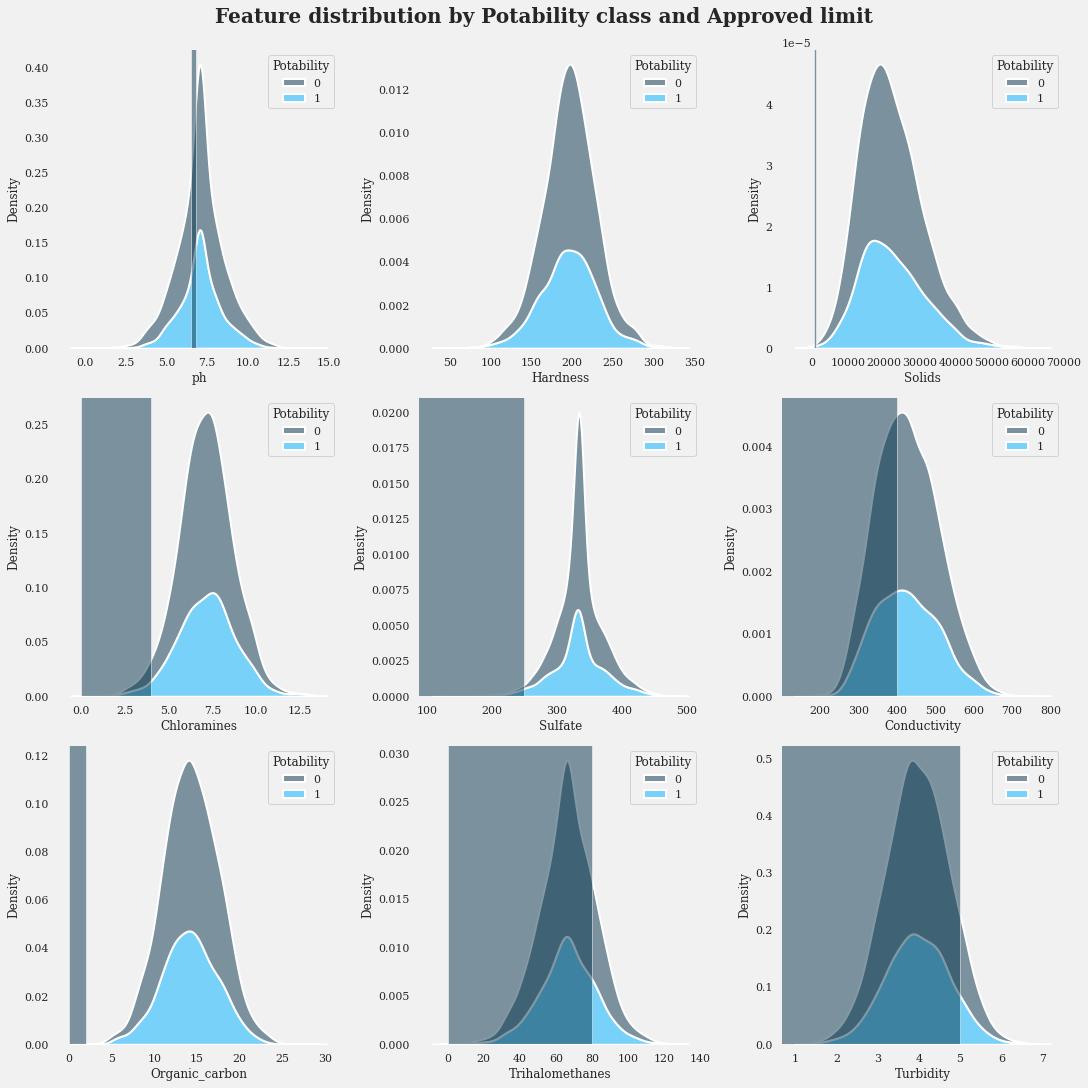

In [25]:
from matplotlib.patches import Rectangle
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

Based on the approved limit, we can clearly see the difference in the water classification. Ex: distribution of non potable water is high on conductivity compared to potable water. same applicable to Turbidity, Trihalomethanes.
But, Ph value, Chloramines, Sulfate, Organic carbon presence doesn't show significant difference. I hope the hypothetical testing can help us here.

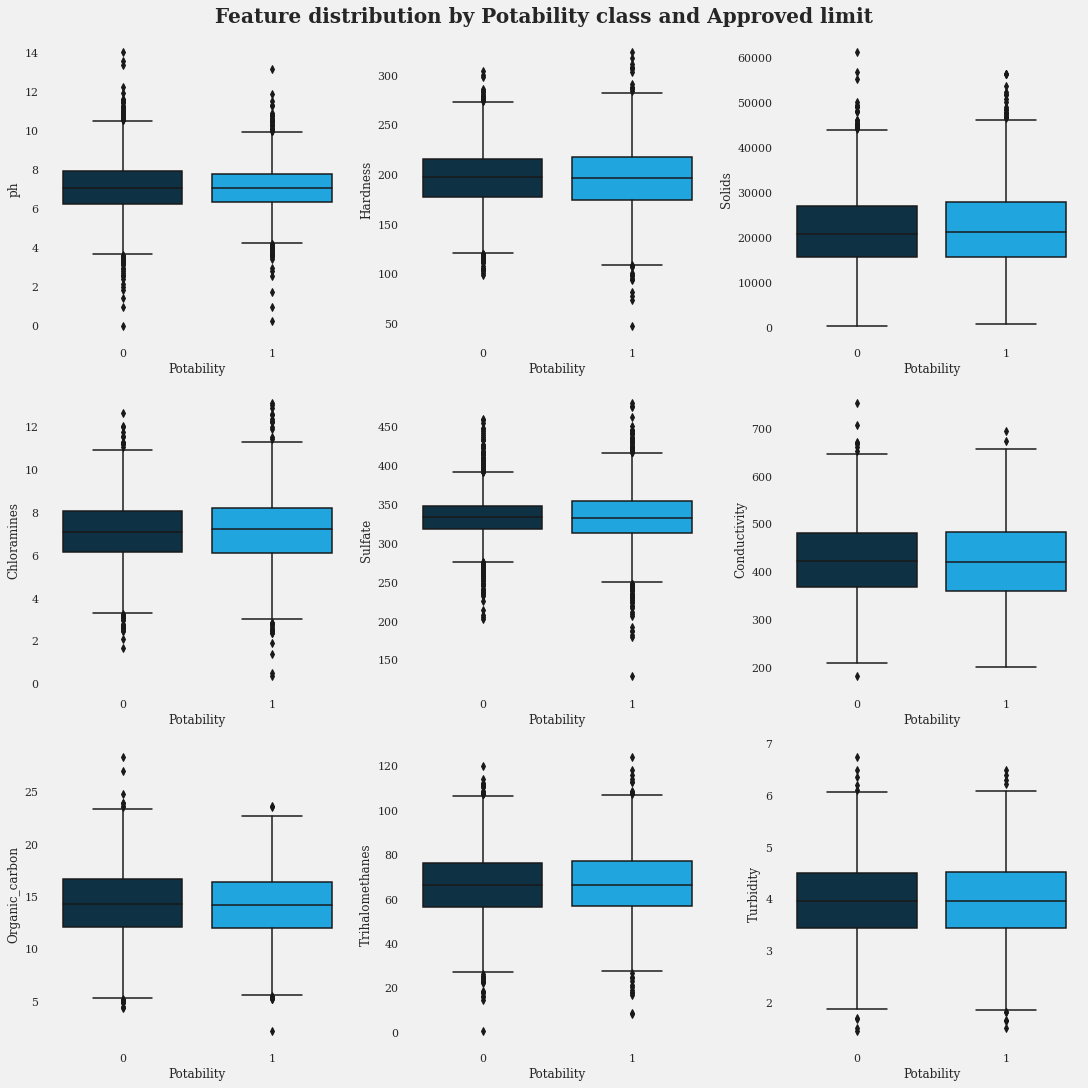

In [26]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

There are outliers in the dataset, we need to handle the same. most feature means are looks similar and there are very less differnce in variance. as mentioned in the above observation, Hypothesis testing would be the right option to identify the singnificance.

## Hypothesis testing

##### Ho (Null Hypothesis) - Mean for both samples/group are same
##### H1 (Alternate Hypothesis) - Mean for both samples/group significantly different.
Significant level - 90%
Alpha - 0.5% (ie., 0.1)

p_value for ph is 0.8257362194511897 we accept the null hypothesis
p_value for Hardness is 0.42854158740864623 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022465074671 we accept the null hypothesis
p_value for Sulfate is 0.12292453703922816 we accept the null hypothesis
p_value for Conductivity is 0.6418845485973537 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746163873828 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is 0.675988889793878 we accept the null hypothesis
p_value for Turbidity is 0.9279391620838058 we accept the null hypothesis


Text(6, 0.12, 'Significance level: 0.1')

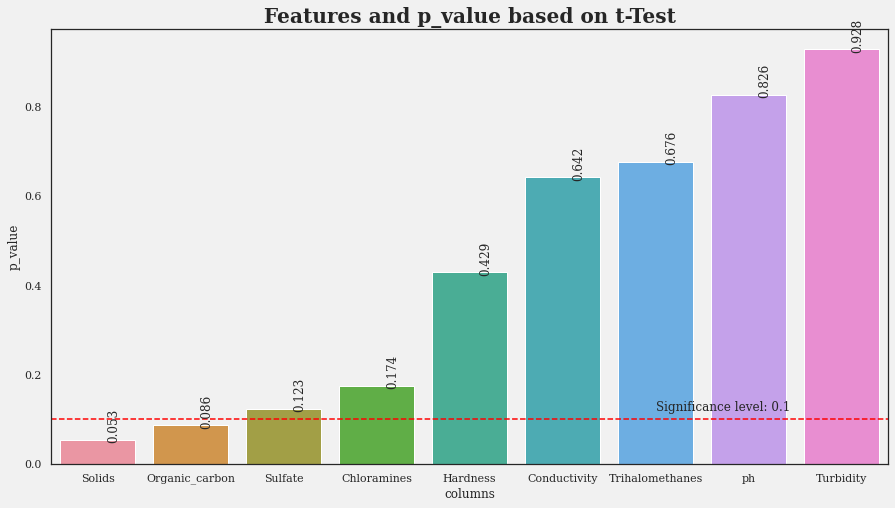

In [27]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=int_cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

From the above Hypothesis testing, we can see that the features solid & Organic_carbon have significant difference in potable & non-potable water. other features shares similarities between two classes.

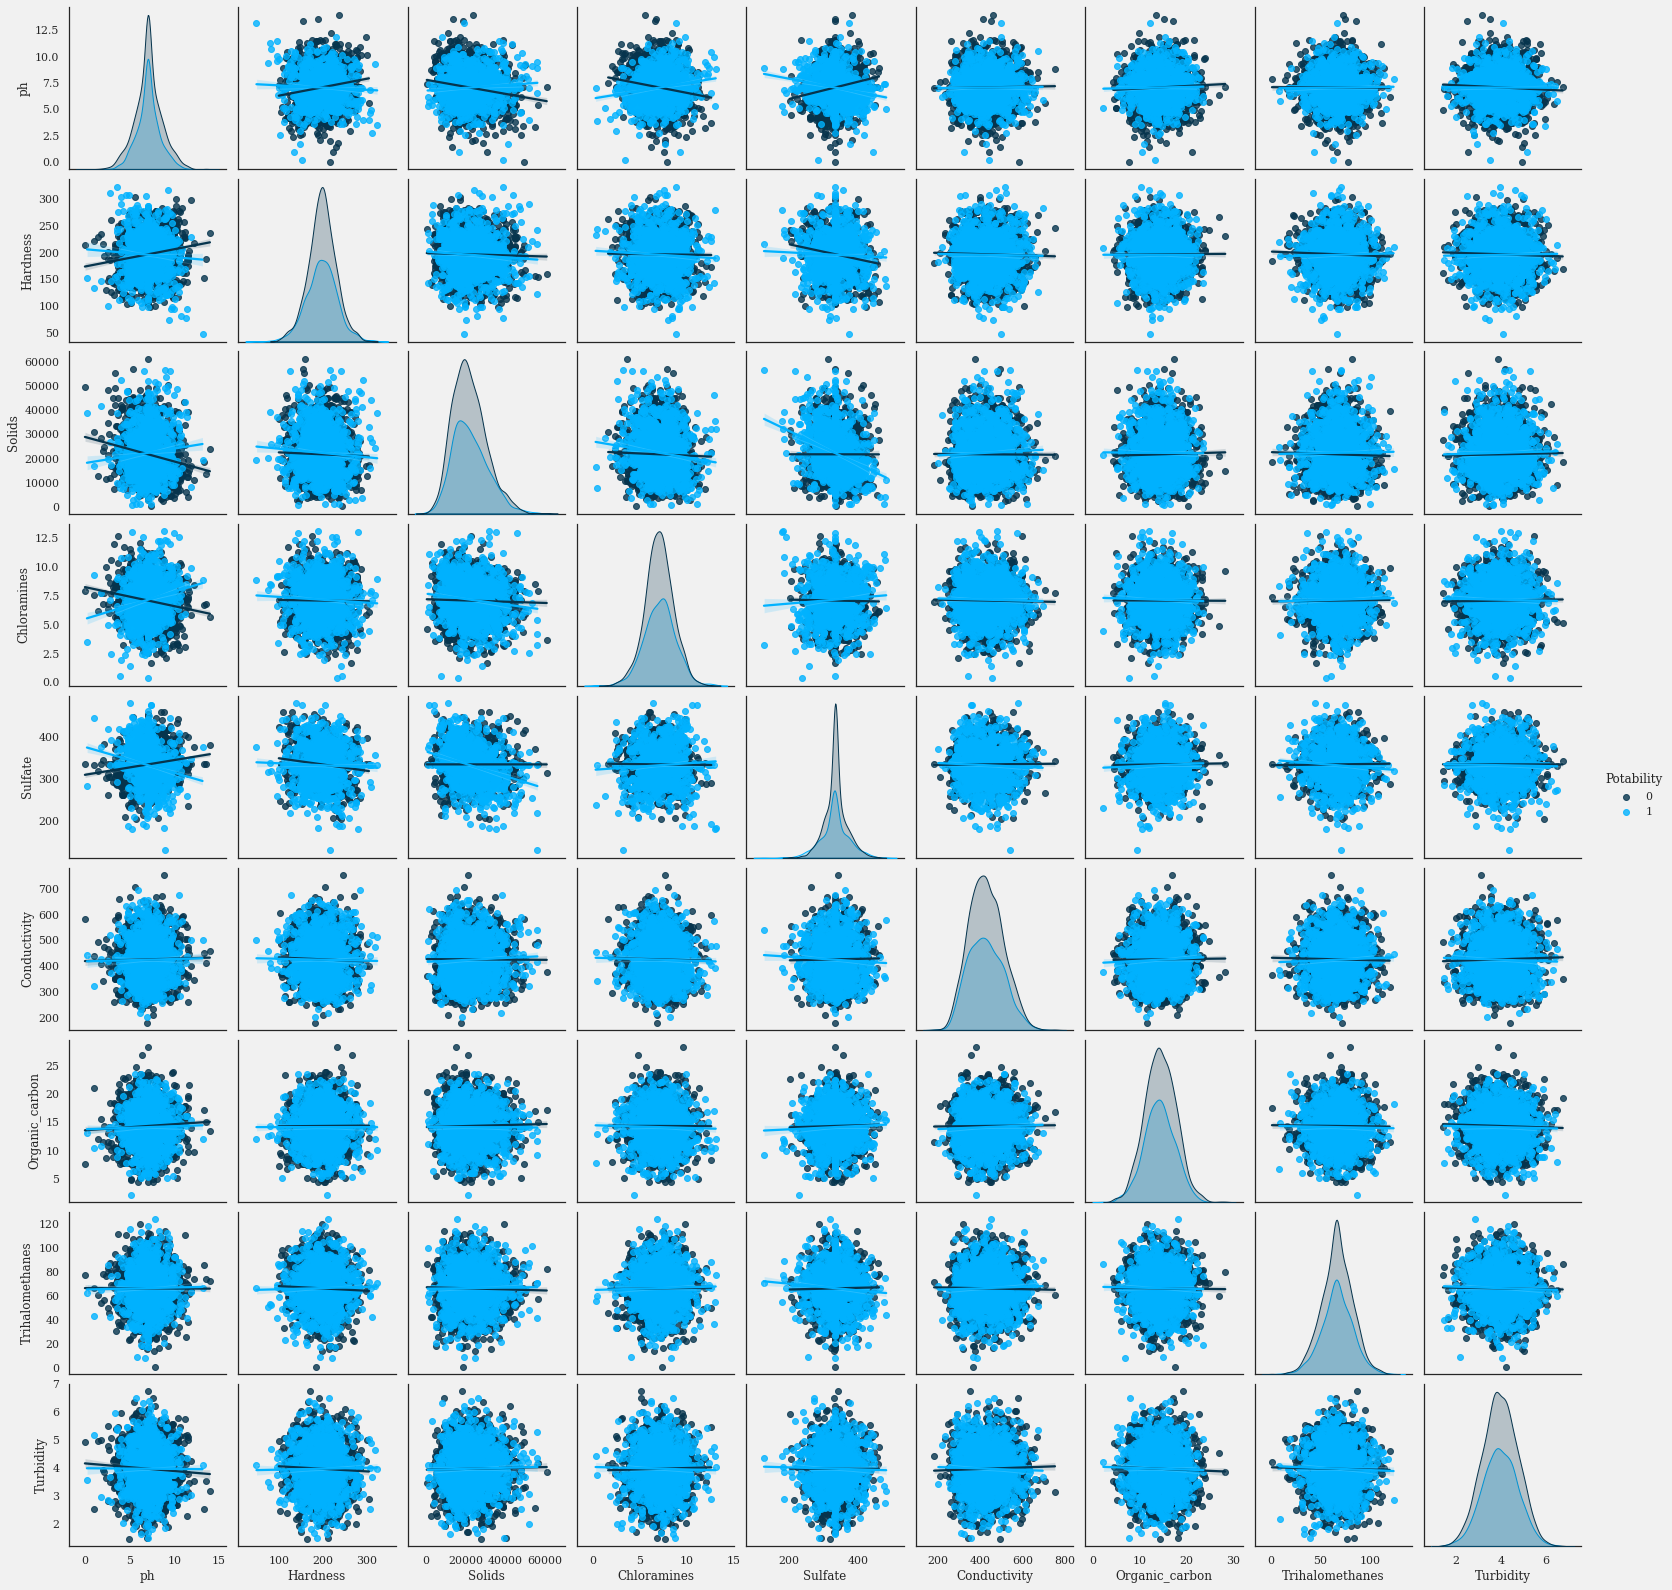

In [28]:
sns.pairplot(df, hue='Potability', kind='reg')

<AxesSubplot:>

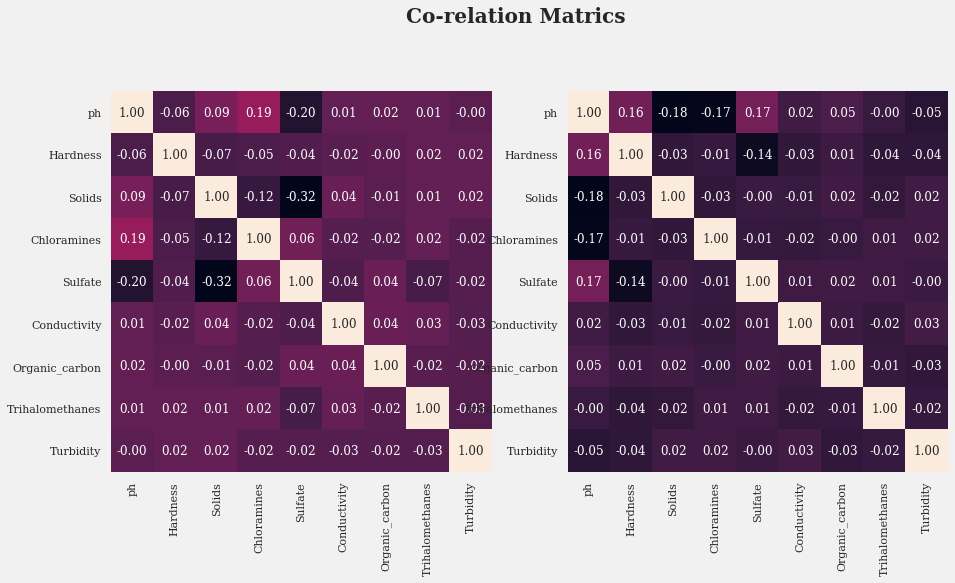

In [29]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

<AxesSubplot:>

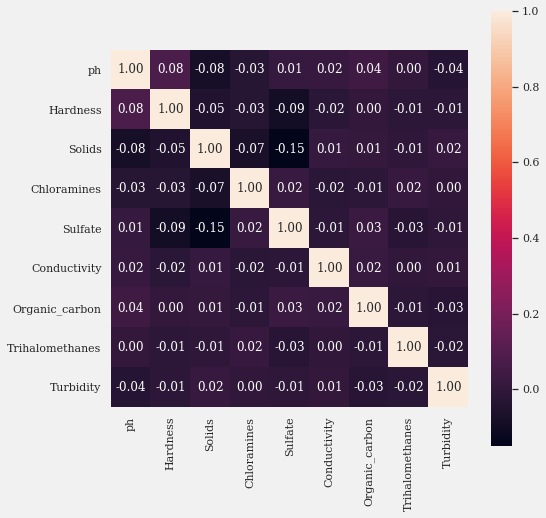

In [30]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

Both Co-relation matrix & Paiplot says that there is no linear relationship between the features that can explan the target variable. So, Linear model may not work on this problem. we need to try with probability based models.

## PCA to check the explained variance

<AxesSubplot:>

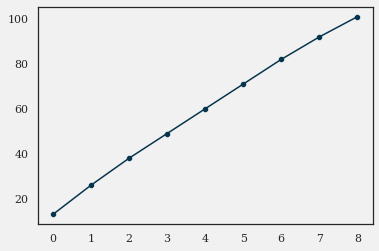

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(['Potability'], axis=1)
y=df['Potability']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
decom = PCA(svd_solver='auto') #let try with auto rather than defining the components
decom.fit(X_scaled)
ex_var=np.cumsum(np.round(decom.explained_variance_ratio_,2))*100
sns.lineplot(y=ex_var, x=np.arange(0,len(ex_var)))
sns.scatterplot(y=ex_var, x=np.arange(0,len(ex_var)))

As mentioned above, all the feature are independent and doesn't share any linear relationship. we would need atleast 7 dimensions to explain 90% of the variations. so dimenstionality reduction doesn't make any change.

In [37]:
#!pip install imblearn

In [38]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [45]:
#!pip install -U scikit-learn --user
try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing


In [50]:
# from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
4,ExtraTreeClassifier(),0.587386
5,KNeighborsClassifier(),0.642814
0,AdaBoostClassifier(),0.693542
3,DecisionTreeClassifier(),0.726133
2,GradientBoostingClassifier(),0.752687
1,BaggingClassifier(),0.754027


From the above basic modeling techinique, average cv score for GradientBoosting & BaggingClassifier is high compared to other models. so, let us try to do hyper tunning for these model to improve the accuracy

### lets try to fine tune the GradientBoosting & Bagging Classifier models

In [51]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")

Best Estimator: {'n_estimators': 700} , Best Score : 0.7688207094918503
Best Estimator: {'n_estimators': 200} , Best Score : 0.7782228864700242


***BaggingClassifier models gives slightly higher accuracy than the Gradientboosting model. further fine tuining could bring more accuracy score. I will stop here considering the computational time. lets try to predict the test dataset with best parameters from above cell and plot the confusion matrix and classification reports***

### GradientBoosting

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       510
           1       0.67      0.81      0.74       309

    accuracy                           0.78       819
   macro avg       0.77      0.79      0.77       819
weighted avg       0.79      0.78      0.78       819



<AxesSubplot:>

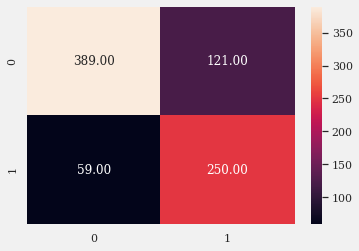

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=300)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

### BaggingClassifier

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       510
           1       0.66      0.70      0.68       309

    accuracy                           0.75       819
   macro avg       0.74      0.74      0.74       819
weighted avg       0.76      0.75      0.75       819



<AxesSubplot:>

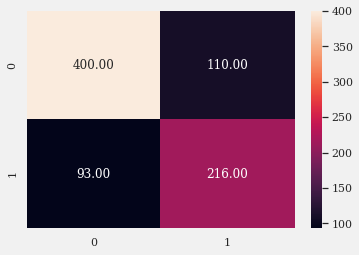

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
model = BaggingClassifier(n_estimators=80)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [54]:
model.predict_proba(X_test)

array([[0.8125, 0.1875],
       [0.55  , 0.45  ],
       [0.675 , 0.325 ],
       ...,
       [0.    , 1.    ],
       [0.9125, 0.0875],
       [0.7   , 0.3   ]])

## Try with H2o AutoML 

In [55]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='2G')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,6 hours 50 mins
H2O_cluster_timezone:,Asia/Colombo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_Asus_efzmz3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [56]:
h2o_df = h2o.H2OFrame(df)
h2o_df['Potability']=h2o_df['Potability'].asfactor()
X=h2o_df.columns[0:-1]
y=h2o_df.columns[-1]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [57]:
train, test=h2o_df.split_frame(ratios=[.7])
print(train.nrows)
print(test.nrows)

2277
999


In [58]:
aml = H2OAutoML(balance_classes=True)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |█
22:59:01.96: AutoML: XGBoost is not available; skipping it.
22:59:01.135: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
22:59:01.135: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_7_AutoML_1_20220202_225900

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06590549895351722
RMSE: 0.2567206632772618
LogLoss: 0.23389305347995
Null degrees of freedom: 2276
Residual degrees of freedom: 2273
Null deviance: 3046.3448365091594
Residual deviance: 1065.1489655476926
AIC: 1073.1489655476926
AUC: 0.9826108732085723
AUCPR: 0.9742207120274645
Gini: 0.9652217464171446

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4531921251445909: 


,,0,1,Error,Rate
0,0,1300.0,88.0,0.0634,(88.0/1388.0)
1,1,81.0,808.0,0.0911,(81.0/889.0)
2,Total,1381.0,896.0,0.0742,(169.0/2277.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.453192,0.905322,195.0
1,max f2,0.356914,0.939801,232.0
2,max f0point5,0.597965,0.930233,144.0
3,max accuracy,0.453192,0.925780,195.0
4,max precision,0.998616,1.000000,0.0
5,max recall,0.199129,1.000000,293.0
6,max specificity,0.998616,1.000000,0.0
7,max absolute_mcc,0.453192,0.844308,195.0
8,max min_per_class_accuracy,0.434351,0.923510,202.0
9,max mean_per_class_accuracy,0.403071,0.925093,213.0



Gains/Lift Table: Avg response rate: 39.04 %, avg score: 40.19 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.993596,2.561305,2.561305,1.000000,0.996283,1.000000,0.996283,0.025872,0.025872,156.130484,156.130484,0.025872
1,2,0.020202,0.990806,2.561305,2.561305,1.000000,0.992255,1.000000,0.994269,0.025872,0.051744,156.130484,156.130484,0.051744
2,3,0.030303,0.988553,2.561305,2.561305,1.000000,0.989905,1.000000,0.992814,0.025872,0.077615,156.130484,156.130484,0.077615
3,4,0.040404,0.985317,2.561305,2.561305,1.000000,0.987199,1.000000,0.991410,0.025872,0.103487,156.130484,156.130484,0.103487
4,5,0.050066,0.978664,2.561305,2.561305,1.000000,0.982917,1.000000,0.989771,0.024747,0.128234,156.130484,156.130484,0.128234
5,6,0.100132,0.951052,2.561305,2.561305,1.000000,0.963114,1.000000,0.976443,0.128234,0.256468,156.130484,156.130484,0.256468
6,7,0.150198,0.919702,2.561305,2.561305,1.000000,0.936022,1.000000,0.962969,0.128234,0.384702,156.130484,156.130484,0.384702
7,8,0.200264,0.844123,2.538837,2.555688,0.991228,0.886554,0.997807,0.943866,0.127109,0.511811,153.883725,155.568794,0.511091
8,9,0.299956,0.628473,2.437189,2.516304,0.951542,0.736415,0.982430,0.874918,0.242970,0.754781,143.718874,151.630387,0.746135
9,10,0.400088,0.441714,1.595199,2.285775,0.622807,0.530857,0.892426,0.788808,0.159730,0.914511,59.519863,128.577479,0.843905




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13672359165697492
RMSE: 0.36976153350095103
LogLoss: 0.4144311422349532
Null degrees of freedom: 2276
Residual degrees of freedom: 2273
Null deviance: 3047.5118428450387
Residual deviance: 1887.3194217379769
AIC: 1895.3194217379769
AUC: 0.8757484204964294
AUCPR: 0.8418878638787038
Gini: 0.7514968409928588

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3937209519982636: 


,,0,1,Error,Rate
0,0,1099.0,289.0,0.2082,(289.0/1388.0)
1,1,210.0,679.0,0.2362,(210.0/889.0)
2,Total,1309.0,968.0,0.2191,(499.0/2277.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.393721,0.731287,217.0
1,max f2,0.155401,0.836927,318.0
2,max f0point5,0.720128,0.790861,100.0
3,max accuracy,0.527831,0.796662,166.0
4,max precision,0.996086,1.000000,0.0
5,max recall,0.015675,1.000000,388.0
6,max specificity,0.996086,1.000000,0.0
7,max absolute_mcc,0.690981,0.570396,109.0
8,max min_per_class_accuracy,0.377779,0.773903,223.0
9,max mean_per_class_accuracy,0.420634,0.778466,207.0



Gains/Lift Table: Avg response rate: 39.04 %, avg score: 39.02 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.988321,2.561305,2.561305,1.000000,0.991489,1.000000,0.991489,0.025872,0.025872,156.130484,156.130484,0.025872
1,2,0.020202,0.980594,2.561305,2.561305,1.000000,0.985457,1.000000,0.988473,0.025872,0.051744,156.130484,156.130484,0.051744
2,3,0.030303,0.968846,2.561305,2.561305,1.000000,0.974992,1.000000,0.983979,0.025872,0.077615,156.130484,156.130484,0.077615
3,4,0.040404,0.960161,2.561305,2.561305,1.000000,0.964412,1.000000,0.979088,0.025872,0.103487,156.130484,156.130484,0.103487
4,5,0.050066,0.953105,2.328459,2.516370,0.909091,0.956465,0.982456,0.974722,0.022497,0.125984,132.845894,151.636966,0.124543
5,6,0.100132,0.923397,2.493902,2.505136,0.973684,0.938587,0.978070,0.956655,0.124859,0.250844,149.390208,150.513587,0.247241
6,7,0.150198,0.858031,2.448967,2.486413,0.956140,0.894883,0.970760,0.936064,0.122610,0.373453,144.896691,148.641288,0.366249
7,8,0.200264,0.749500,2.044550,2.375947,0.798246,0.805784,0.927632,0.903494,0.102362,0.475816,104.455035,137.594725,0.452040
8,9,0.299956,0.563026,1.466827,2.073794,0.572687,0.649783,0.809663,0.819171,0.146232,0.622047,46.682656,107.379440,0.528387
9,10,0.400088,0.424901,1.157081,1.844364,0.451754,0.492254,0.720088,0.737352,0.115861,0.737908,15.708069,84.436441,0.554190


In [59]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_7_AutoML_1_20220202_225900,0.875748,0.414431,0.841888,0.222217,0.369762,0.136724
GBM_grid_1_AutoML_1_20220202_225900_model_60,0.87453,0.422094,0.842026,0.223437,0.371655,0.138127
StackedEnsemble_BestOfFamily_4_AutoML_1_20220202_225900,0.872694,0.416278,0.837458,0.228208,0.371749,0.138197
StackedEnsemble_BestOfFamily_6_AutoML_1_20220202_225900,0.872661,0.417433,0.83786,0.23386,0.372422,0.138698
StackedEnsemble_AllModels_6_AutoML_1_20220202_225900,0.872195,0.416675,0.83841,0.232538,0.372314,0.138618
StackedEnsemble_AllModels_4_AutoML_1_20220202_225900,0.871827,0.417417,0.837307,0.230895,0.373306,0.139358
StackedEnsemble_Best1000_1_AutoML_1_20220202_225900,0.871679,0.430892,0.839402,0.233038,0.374248,0.140061
StackedEnsemble_AllModels_3_AutoML_1_20220202_225900,0.871564,0.41756,0.835756,0.230635,0.373185,0.139267
GBM_grid_1_AutoML_1_20220202_225900_model_103,0.870725,0.423837,0.838625,0.228517,0.373299,0.139352
StackedEnsemble_AllModels_2_AutoML_1_20220202_225900,0.869649,0.419569,0.83697,0.235982,0.374607,0.140331


In [60]:
type(test['Potability'])

h2o.frame.H2OFrame

In [61]:
pred = aml.leader.predict(test)
y_val = h2o.as_list(test['Potability'], use_pandas=True)
pred_val = h2o.as_list(pred['predict'], use_pandas=True)
print(classification_report(y_val,pred_val))

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       610
           1       0.70      0.76      0.73       389

    accuracy                           0.78       999
   macro avg       0.77      0.78      0.77       999
weighted avg       0.79      0.78      0.78       999



***Both Gradient Boosting and Bagging Algorithms gives us f1 score (Balanced with precision & recall) as around 76% and H2O AI gives us 80% accuracy with StackedEnsemble model. I hope this is good model for initial analysis. further fine tuning and outlier handling might help for more accuracy. However, we will stop here considering the computational timing***